In [2]:
import os
# Create the .kaggle directory if it doesn't exist
kaggle_dir = os.path.expanduser("~/.kaggle")
# Hàm os.path.expanduser trả về đường dẫn đầy đủ của thư mục home của người dùng
# giá trị của biến kaggle_dir sẽ là đường dẫn đầy đủ của thư mục .kaggle trong thư mục home của người dùng.
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Upload the kaggle.json file to the .kaggle directory
kaggle_file = os.path.join(kaggle_dir, "kaggle.json")
with open(kaggle_file, "w") as f:
# Lệnh with sẽ tạo một block (khối) code, trong đó tệp tin sẽ được mở với chế độ ghi (write mode, "w"), và nó sẽ được đặt vào biến f, có thể sử dụng để ghi dữ liệu vào tệp tin.
# Sau khi hoàn thành việc ghi, tệp tin sẽ tự động đóng
    f.write("{\"username\":\"hoangkaggle\",\"key\":\"37c66ac0239329b363dbe675889ef626\"}")

# Change the permissions of the kaggle.json file to 600
os.chmod(kaggle_file, 600) 
# hàm os.chmod để thay đổi quyền truy cập của một tệp tin.
# Hàm os.chmod nhận hai tham số: đầu tiên là đường dẫn tới tệp tin (ở đây là biến kaggle_file), và tham số thứ hai là giá trị quyền truy cập mới (ở đây là 600).
# nếu giá trị quyền truy cập là 600, nghĩa là chỉ có người sở hữu tệp tin có quyền để đọc và ghi tệp tin, và không có ai khác có thể truy cập tệp tin đó.

In [3]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 92% 206M/225M [00:01<00:00, 204MB/s]
100% 225M/225M [00:01<00:00, 184MB/s]


In [4]:
#Giải nén file dataset
DATADIR = '/content/flowers-recognition.zip'
!unzip -q -n $DATADIR

In [5]:
import os
print(os.listdir('/content/flowers'))

['rose', 'daisy', 'sunflower', 'tulip', 'dandelion']


## Nội Dung :

[ **1 ) Import các thư viện**](#content1)

[ **2 ) Chuẩn bị Data**](#content2)

[ **3 )Huấn luyện Model**](#content3)

[ **4 )Đánh giá Model**](#content4)

[ **5 )Hiển thị đánh giá**](#content5)

<a id="content1"></a>
## 1 ) Import các thư viện.

In [6]:
# Ignore  the warnings
# xử lý cảnh báo (warnings) 
# Hàm warnings.filterwarnings nhận một tham số chuỗi và thiết lập cách xử lý cảnh báo.
import warnings
warnings.filterwarnings('always') 
# nghĩa là tất cả cảnh báo sẽ được hiển thị mỗi khi xảy ra.
warnings.filterwarnings('ignore')
# nghĩa là tất cả cảnh báo sẽ bị bỏ qua và không được hiển thị.

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

<a id="content2"></a>
## 2 ) Chuẩn bị Data

## 2.1) Tạo hàm để lấy tệp train và tệp test từ ảnh

In [7]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/flowers/sunflower'
FLOWER_TULIP_DIR='/content/flowers/tulip'
FLOWER_DANDI_DIR='/content/flowers/dandelion'
FLOWER_ROSE_DIR='/content/flowers/rose'


In [8]:
def assign_label(img,flower_type):
    return flower_type
    

In [9]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        
        

In [10]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:02<00:00, 294.87it/s]

764


In [11]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:02<00:00, 302.07it/s]

1497


In [12]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 397.73it/s]

2481


In [13]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 405.84it/s]

3533


In [14]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 429.83it/s]

4317


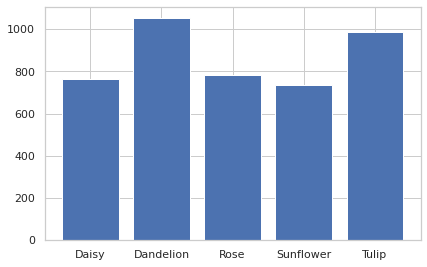

In [15]:
unique, count = np.unique(Z, return_counts=True)
plt.bar(unique, count)
plt.show()

## 2.2 ) Hiển thị random 1 số bức ảnh 

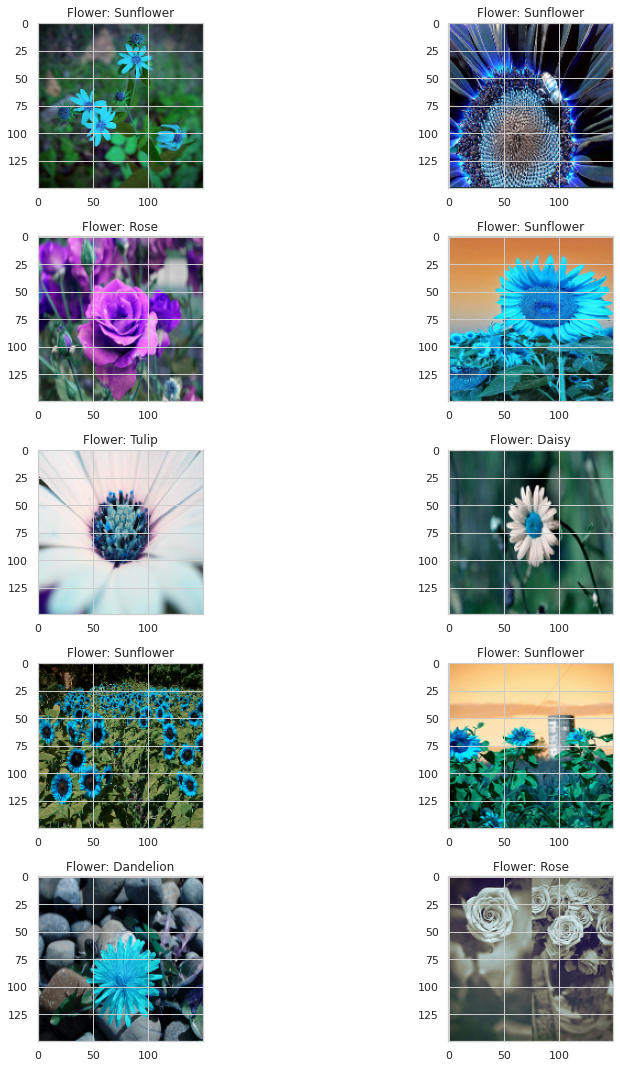

In [16]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

## 2.3 ) Mã hoá nhãn

In [17]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

## 2.4 ) Chia thành 2 tệp train và tệp test

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


## 2.5 ) Cài Đặt Random Seeds

In [19]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

<a id="content3"></a>
## 3 ) Huấn luyện Model

## 3.1 ) Xây dựng ConvNet Model

---



In [20]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

## 3.2 ) Sử dụng LR Annealer

In [21]:
batch_size=128
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## 3.3 ) Data Augmentation để tránh Overfitting

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## 3.4 ) Biên dịch Model và Tổng kết

In [23]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## 3.5 ) Fit tập train và dự đoán trên tập test

In [26]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 10, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/10
25/25 [==============================] - 221s 9s/step - loss: 1.3077 - accuracy: 0.4275 - val_loss: 1.1373 - val_accuracy: 0.5167
Epoch 2/10
25/25 [==============================] - 208s 8s/step - loss: 1.1643 - accuracy: 0.5156 - val_loss: 1.1106 - val_accuracy: 0.5685
Epoch 3/10
25/25 [==============================] - 210s 8s/step - loss: 1.0865 - accuracy: 0.5712 - val_loss: 0.9931 - val_accuracy: 0.5954
Epoch 4/10
25/25 [==============================] - 210s 8s/step - loss: 0.9923 - accuracy: 0.6160 - val_loss: 0.9026 - val_accuracy: 0.6472
Epoch 5/10
25/25 [==============================] - 210s 9s/step - loss: 0.9531 - accuracy: 0.6253 - val_loss: 0.9307 - val_accuracy: 0.6389
Epoch 6/10
25/25 [==============================] - 208s 8s/step - loss: 0.9023 - accuracy: 0.6427 - val_loss: 0.8539 - val_accuracy: 0.6694
Epoch 7/10
25/25 [==============================] - 202s 8s/step - loss: 0.8859 - accuracy: 0.6603 - val_loss: 0.8786 - val_accuracy: 0.6833
Epoch 8/10
25

In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', "{:.2f}%".format(test_accuracy*100))

34/34 [==============================] - 23s 669ms/step - loss: 0.7912 - accuracy: 0.7037
Test loss: 0.791228175163269
Test accuracy: 70.37%


<a id="content4"></a>
## 4 ) Đánh giá Model

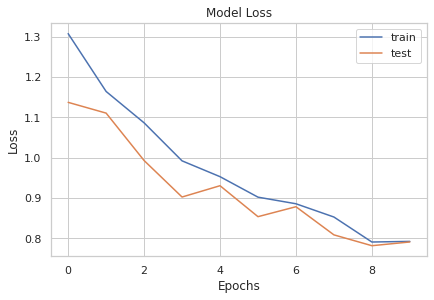

In [28]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

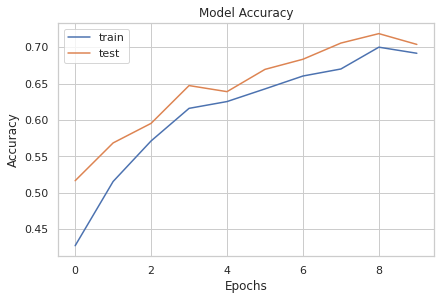

In [29]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


<a id="content5"></a>
## 5 ) Hiển thị dự đoán trên tập test

In [30]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 [==============================] - 17s 483ms/step


In [31]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

#### CORRECTLY CLASSIFIED FLOWER IMAGES

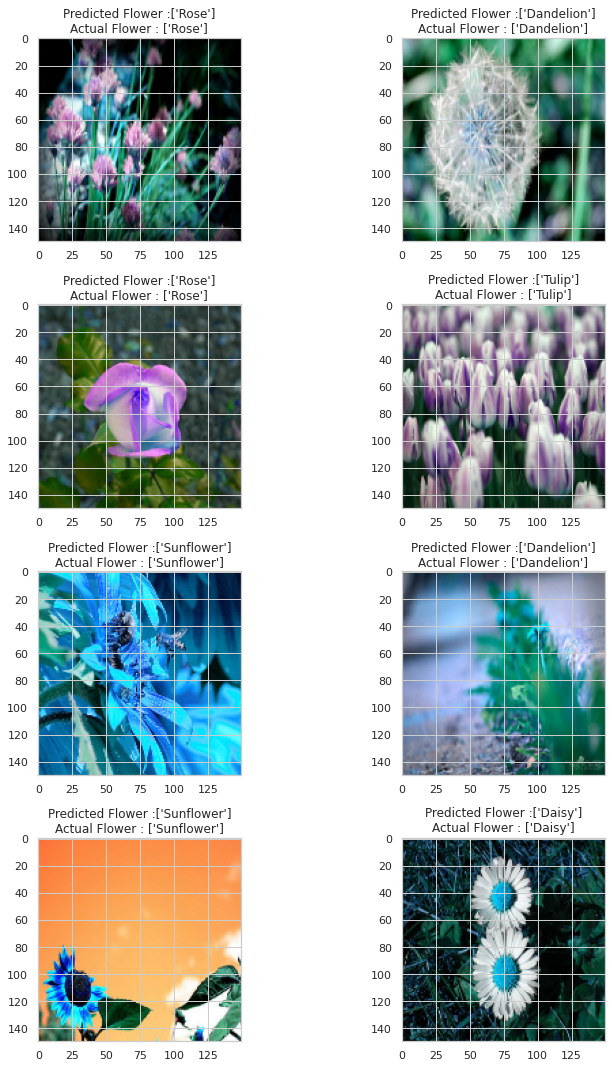

In [32]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])        
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])]))) 
        plt.tight_layout()
        count+=1

#### MISCLASSIFIED IMAGES OF FLOWERS

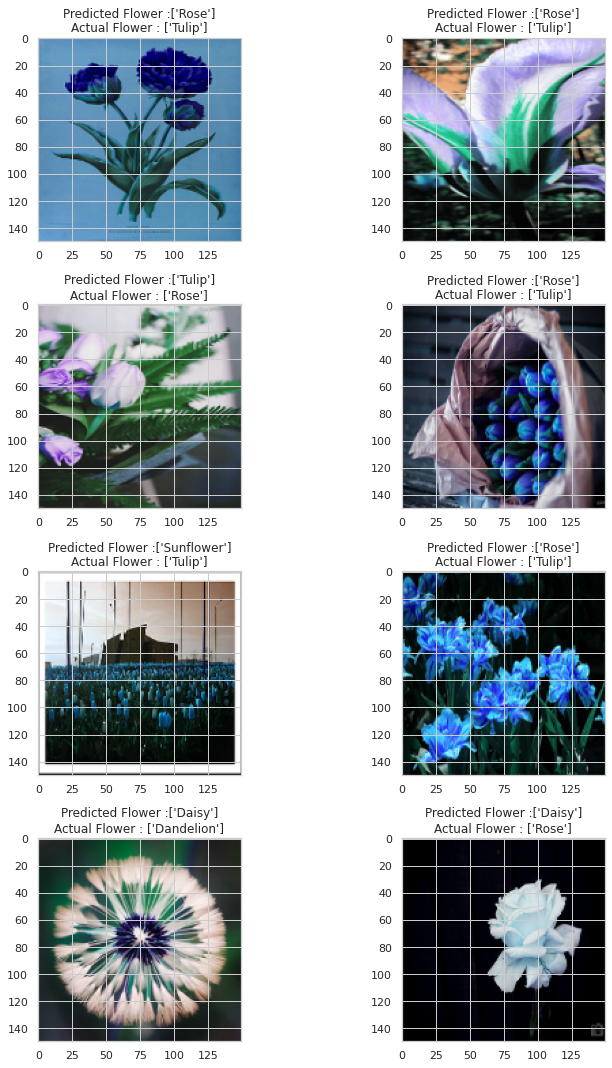

In [33]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [34]:
#Save the model
model.save('Model.h5')

In [35]:
#Load the model
model = keras.models.load_model('Model.h5')

In [37]:
import urllib.request
url = input('Nhập URL của ảnh:')
response = urllib.request.urlopen(url)
img_array = np.array(bytearray(response.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

if img is None:
    print("Lỗi đọc ảnh từ URL !")
else:
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.expand_dims(img, axis=0)

    # Make predictions on the input image
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)

    # Output the predicted flower class
    print("Loại hoa dự đoán là: ", le.inverse_transform([predicted_class[0]]))

Nhập URL của ảnh:https://www.google.com/imgres?imgurl=https%3A%2F%2Fhips.hearstapps.com%2Fhmg-prod.s3.amazonaws.com%2Fimages%2Fmarguerite-daisy-types-1586981163.jpg&imgrefurl=https%3A%2F%2Fwww.countryliving.com%2Fgardening%2Fg32161249%2Fdaisy-types%2F&tbnid=LFAspe8e9pgYcM&vet=12ahUKEwjMwpus4sf9AhXFuFYBHRcNDocQMygCegUIARClAQ..i&docid=csm3mHXnVn_nyM&w=1300&h=1414&q=flower%20daisy&ved=2ahUKEwjMwpus4sf9AhXFuFYBHRcNDocQMygCegUIARClAQ
Lỗi đọc ảnh từ URL !


In [ ]:
! pip install streamlit -q

In [ ]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
import urllib.request
import numpy as np  
import cv2 
import keras
from tqdm import tqdm
import os  
from PIL import Image
from sklearn.preprocessing import LabelEncoder

IMG_SIZE=150

le = LabelEncoder()
le.fit(['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])

model = keras.models.load_model('img_model')
st.set_option('deprecation.showfileUploaderEncoding', False)
st.set_option('deprecation.showPyplotGlobalUse', False)
st.set_page_config(page_title="Phân Loại Ảnh Các Loại Hoa ", page_icon=":flower:", layout="centered")
st.title("Phân Loại Ảnh Các Loại Hoa ")

st.text("Upload hình ảnh hoặc nhập đường dẫn URL")

uploaded_file = st.file_uploader("Chọn hình ảnh...", type=["jpg", "jpeg", "png"])
url = st.text_input("Hoặc nhập đường dẫn URL của ảnh:")

if uploaded_file is not None:
   img_upload = Image.open(uploaded_file)
   st.image(img_upload, caption='Đã upload ảnh!')
   if st.button('Đoán loại hoa'):
      st.write('Đang phân loại ảnh...')
      img = np.array(img_upload)

      img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
      img = np.expand_dims(img, axis=0)

      # Make predictions on the input image
      predictions = model.predict(img)
      predicted_class = np.argmax(predictions, axis=1)

      # Get the confidence scores for each flower class
      confidence_scores = predictions[0]

      # Create a subplot layout
      fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

      # Plot the input image
      ax1.imshow(img_upload)
      ax1.set_title('Ảnh Đầu Vào')

      # Plot the confidence scores as a bar chart
      ax2.bar(le.classes_, confidence_scores)
      ax2.set_xlabel('Loại Hoa')
      ax2.set_ylabel('Điểm Đánh Giá')
      ax2.set_title('Độ Chính Xác')

      # Output the predicted flower class
      st.write("Kết quả loại hoa này là: ", le.inverse_transform([predicted_class[0]]))
      st.pyplot(fig)

if url:
   response = urllib.request.urlopen(url)
   img_array = np.array(bytearray(response.read()), dtype=np.uint8)
   img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

   if img is None:
      st.write("Lỗi đọc ảnh từ đường dẫn URL !")
   else:
      img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
      img = np.expand_dims(img, axis=0)

      # Make predictions on the input image
      predictions = model.predict(img)
      predicted_class = np.argmax(predictions, axis=1)

     # Get the confidence scores for each flower class
      confidence_scores = predictions[0]

     # Plot the confidence scores as a bar chart
      plt.figure(figsize=(4, 2))
      plt.bar(le.classes_, confidence_scores, width=0.5)
      plt.xlabel('Loại Hoa', fontsize=8)
      plt.ylabel('Điểm Đánh Giá', fontsize=8)
      plt.xticks(fontsize=6)
      plt.yticks(fontsize=6)

    # Output the predicted flower class
      st.write("Kết quả loại hoa này là: ", le.inverse_transform([predicted_class[0]]))
      st.pyplot()


Overwriting app.py


In [ ]:
!streamlit run app.py --server.port 8000 & npx localtunnel --port 8000

[##................] / fetchMetadata: sill resolveWithNewModule ansi-styles@4.3


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8000
  External URL: http://34.125.47.148:8000

npx: installed 22 in 4.443s
your url is: https://clear-cats-join-34-125-47-148.loca.lt
2023-02-21 06:37:06.433573: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-21 06:37:06.433826: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/loca